In [34]:
from src.plots import *
from src.evaluate import record_model
from src.data import *
import os

In [35]:
categorical_features = [
    "template_id",
    "brake_type_code",
    "frame_material_code",
    "shifting_code",
    "condition_code",
    "sales_country_id",
    "bike_type_id",
    "bike_category_id",
    "mileage_code",
    "motor",
    "bike_component_id",
    "family_model_id",
    "family_id",
    "brand_id",
    "color",
    "is_mobile",
    "is_ebike",
    "is_frameset",
]

# 8 numerical fetures
numerical_features = [
    "msrp",
    "bike_created_at_month",
    "bike_created_at_year",
    "bike_year",
    "rider_height_min",
    "rider_height_max",
    "sales_duration",
    "quality_score",
]

In [73]:
numerical_features = [x for x in numerical_features if x != "msrp"]
numerical_features

['bike_created_at_month',
 'bike_created_at_year',
 'bike_year',
 'rider_height_min',
 'rider_height_max',
 'sales_duration',
 'quality_score']

In [71]:
# record_model("test", categorical_features, numerical_features)

In [69]:
query = """
                SELECT


                bikes.id as id,
                bikes.bike_template_id as template_id,

                -- traget
                booking_accountings.bike_price_currency as sales_price,

                -- prices


                bikes.msrp as msrp,
                bikes.common_price as m1_price,


                -- temporal

                year(bikes.created_at) as bike_created_at_year,
                month(bikes.created_at) as bike_created_at_month,
                bikes.year as bike_year,



                -- take if succeed_at is not null, else take updated_at difference to created_at
                CASE
                    WHEN bookings.succeed_at IS NOT NULL THEN DATEDIFF(bookings.succeed_at,bikes.created_at)
                    ELSE DATEDIFF(bookings.updated_at,bikes.created_at)

                END as sales_duration,



                -- spatial

                bikes.country_id as sales_country_id,

                -- categorizing
                bikes.bike_type_id as bike_type_id,
                bikes.bike_category_id as bike_category_id,
                bikes.mileage_code as mileage_code,
                bikes.motor as motor,

                bikes.condition_code as condition_code,



                bike_additional_infos.rider_height_min as rider_height_min,
                bike_additional_infos.rider_height_max as rider_height_max,


                bikes.brake_type_code as brake_type_code,
                bikes.frame_material_code as frame_material_code,
                bikes.shifting_code as shifting_code,






                bikes.bike_component_id as bike_component_id,

                -- find similarity between hex codes
                bikes.color as color,

                -- quite specific
                bikes.family_model_id as family_model_id,
                bikes.family_id as  family_id,
                bikes.brand_id as brand_id,

                -- quality score
                quality_scores.score AS quality_score,

                -- is_mobile
                bikes.is_mobile as is_mobile,

                -- currency

                -- seller id

                -- is_frameset
                bike_template_additional_infos.is_ebike as is_ebike,
                bike_template_additional_infos.is_frameset as is_frameset




                FROM bikes

                join bookings on bikes.id = bookings.bike_id
                join booking_accountings on bookings.id = booking_accountings.booking_id


                join quality_scores on bikes.id = quality_scores.bike_id


                join bike_template_additional_infos on bikes.bike_template_id = bike_template_additional_infos.bike_template_id

                join bike_additional_infos on bikes.id = bike_additional_infos.bike_id


                WHERE bikes.bike_template_id = 79204 and bikes.status = 'sold'
             """

In [46]:
query_dtype = {
    "id": pd.Int64Dtype(),
    "template_id": pd.Int64Dtype(),
    "sales_price": pd.Float64Dtype(),
    "sales_duration": pd.Int64Dtype(),
    "msrp": pd.Float64Dtype(),
    "m1_price": pd.Float64Dtype(),
    "bike_created_at_year": pd.Int64Dtype(),
    "bike_created_at_month": pd.Int64Dtype(),
    "bike_year": pd.Int64Dtype(),
    "sales_country_id": pd.Int64Dtype(),
    "bike_type_id": pd.Int64Dtype(),
    "bike_category_id": pd.Int64Dtype(),
    "mileage_code": str,
    "motor": pd.Int64Dtype(),
    "rider_height_min": pd.Float64Dtype(),
    "rider_height_max": pd.Float64Dtype(),
    "brake_type_code": str,
    "condition_code": str,
    "frame_material_code": str,
    "shifting_code": str,
    "bike_component_id": pd.Int64Dtype(),
    "color": str,
    "family_model_id": pd.Int64Dtype(),
    "family_id": pd.Int64Dtype(),
    "brand_id": pd.Int64Dtype(),
    "quality_score": pd.Int64Dtype(),
    "is_mobile": pd.Int64Dtype(),
    "is_ebike": pd.Int64Dtype(),
    "is_frameset": pd.Int64Dtype(),
}

In [68]:
df_full = get_data(query, query_dtype, index_col="id")
df_full

,template_id,sales_price,msrp,m1_price,bike_created_at_year,bike_created_at_month,bike_year,sales_duration,sales_country_id,bike_type_id,...,shifting_code,bike_component_id,color,family_model_id,family_id,brand_id,quality_score,is_mobile,is_ebike,is_frameset
id,,,,,,,,,,,,,,,,,,,,,


In [44]:
df_full.iloc[0]

template_id                      11003
sales_price                     2780.0
msrp                           13500.0
m1_price                      10172.25
bike_created_at_year              2023
bike_created_at_month                2
bike_year                         2021
sales_duration                       0
sales_country_id                   150
bike_type_id                         1
bike_category_id                     1
mileage_code             less_than_500
motor                                0
condition_code                       3
rider_height_min                 168.0
rider_height_max                 178.0
brake_type_code              hydraulic
frame_material_code             carbon
shifting_code               electronic
bike_component_id                   22
color                          #111827
family_model_id                   6791
family_id                          132
brand_id                           113
quality_score                       59
is_mobile                

In [27]:
df_full.drop(columns=["sales_price", "m1_price"], inplace=True)

In [29]:
row = {}
for column_name, value in df_full.iloc[15].items():
   row[column_name] = value
row

{'template_id': 11003,
 'msrp': 13500.0,
 'bike_created_at_year': 2024,
 'bike_created_at_month': 1,
 'bike_year': 2021,
 'sales_duration': 94,
 'sales_country_id': 146,
 'bike_type_id': 1,
 'bike_category_id': 1,
 'mileage_code': '500_3000',
 'motor': 0,
 'condition_code': '3',
 'rider_height_min': 173.0,
 'rider_height_max': 183.0,
 'brake_type_code': 'hydraulic',
 'frame_material_code': 'carbon',
 'shifting_code': 'electronic',
 'bike_component_id': 11,
 'color': '#111827',
 'family_model_id': 6791,
 'family_id': 132,
 'brand_id': 113,
 'quality_score': 51,
 'is_mobile': 0,
 'is_ebike': 0,
 'is_frameset': 0}

In [ ]:
curl -i -X POST http://0.0.0.0:8000/price_interval \
        -H "Content-Type: application/json" \
        -H "strategy: Generic" \
        -H "version: canary-001" \
        -d '[{"template_id": 11003,"sales_price": 2780.0,"msrp": 13500.0,"bike_created_at_year": 2023,"bike_created_at_month": 2,"bike_year": 2021, "sales_duration": 0,"sales_country_id": 150,"bike_type_id": 1,"bike_category_id": 1,"mileage_code": "less_than_500","motor": 0,"condition_code": "3","rider_height_min": 168.0,"rider_height_max": 178.0,"brake_type_code": "hydraulic","frame_material_code": "carbon","shifting_code": "electronic","bike_component_id": 22, "family_model_id": 6791,"family_id": 132,"brand_id": 113,"quality_score": 59,"is_mobile": 0,"is_ebike": 0,"is_frameset": 0,"color": "#111827"}]'

### model with random split
### model 1(current model): mean_absolute_percentage_error: 25.55204771248359, 89.34147997284454 % target fall in interval
### model 2(delete iqr_limit for all numerical features): mean_absolute_percentage_error: 30.489007907159692, 88.228299643281 8% target fall in interval
### model 3(delete iqr_limit for msrp feature): mean_absolute_percentage_error: 27.39829129068927, 89.1160949868074 % target fall in interval
### model 4(range the msrp to more than 30% of msrp): mean_absolute_percentage_error: 24.261789520145754, 87.87671232876713 % target fall in interval

## Test for high price bike, case 0
```
curl -i -X POST http://0.0.0.0:8000/price_interval \
        -H "Content-Type: application/json" \
        -H "strategy: Generic" \
        -H "version: canary-001" \
        -d '[{"template_id": 11003,"msrp": 13500.0,"bike_created_at_year": 2023,"bike_created_at_month": 2,"bike_year": 2021,"sales_country_id": 150,"bike_type_id": 1,"bike_category_id": 1,"mileage_code": "less_than_500","motor": 0,"condition_code": "3","rider_height_min": 168.0,"rider_height_max": 178.0,"brake_type_code": "hydraulic","frame_material_code": "carbon","shifting_code": "electronic","bike_component_id": 22,"color": "#111827", "family_model_id": 6791,"family_id": 132,"brand_id": 113,"quality_score": 59,"is_mobile": 0,"is_ebike": 0,"is_frameset": 0}]'
```
```
sales_price                     2780.0, msrp                           13500.0, m1_price                      10172.2
model 1: {"status":"success","strategy_target":"Generic","strategy":"Generic","quantiles":[0.2,0.5,0.8],"price":[4650.0],"interval":[[4542,4774]],"app_name":"price","app_version":"canary-001"}
model 2: {"status":"success","strategy_target":"Generic","strategy":"Generic","quantiles":[0.2,0.5,0.8],"price":[6800.0],"interval":[[6483,6823]],"app_name":"price","app_version":"canary-001"}
model 3: {"status":"success","strategy_target":"Generic","strategy":"Generic","quantiles":[0.2,0.5,0.8],"price":[4650.0],"interval":[[4548,4780]],"app_name":"price","app_version":"canary-001"}
```

# Test for high price bike, case 15
```
curl -i -X POST http://0.0.0.0:8000/price_interval \
        -H "Content-Type: application/json" \
        -H "strategy: Generic" \
        -H "version: canary-001" \
        -d '[{"template_id": 11003,"msrp": 13500.0,"bike_created_at_year": 2024,"bike_created_at_month": 1,"bike_year": 2021,"sales_country_id": 146,"bike_type_id": 1,"bike_category_id": 1,"mileage_code": "500_3000","motor": 0,"condition_code": "3","rider_height_min": 173.0,"rider_height_max": 183.0,"brake_type_code": "hydraulic","frame_material_code": "carbon","shifting_code": "electronic","bike_component_id": 11,"color": "#111827", "family_model_id": 6791,"family_id": 132,"brand_id": 113,"quality_score": 51,"is_mobile": 0,"is_ebike": 0,"is_frameset": 0}]'
```
```
sales_price                  7700.0, msrp                        13500.0, m1_price                  7533.3375
model 1: {"status":"success","strategy_target":"Generic","strategy":"Generic","quantiles":[0.2,0.5,0.8],"price":[4925.0],"interval":[[4790,5036]],"app_name":"price","app_version":"canary-001"}
model 2: {"status":"success","strategy_target":"Generic","strategy":"Generic","quantiles":[0.2,0.5,0.8],"price":[6800.0],"interval":[[6483,6823]],"app_name":"price","app_version":"canary-001"}
model 3: {"status":"success","strategy_target":"Generic","strategy":"Generic","quantiles":[0.2,0.5,0.8],"price":[3300.0],"interval":[[3265,3430]],"app_name":"price","app_version":"canary-001"}
```

In [55]:
df = df_full.drop(columns=["m1_price"])
df

,template_id,sales_price,msrp,bike_created_at_year,bike_created_at_month,bike_year,sales_duration,sales_country_id,bike_type_id,bike_category_id,...,shifting_code,bike_component_id,color,family_model_id,family_id,brand_id,quality_score,is_mobile,is_ebike,is_frameset
id,,,,,,,,,,,,,,,,,,,,,
142053,11003,2780.0,13500.0,2023,2,2021,0,150,1,1,...,electronic,22,#111827,6791,132,113,59,0,0,0
142053,11003,2780.0,13500.0,2023,2,2021,0,150,1,1,...,electronic,22,#111827,6791,132,113,59,0,0,0
142053,11003,2780.0,13500.0,2023,2,2021,0,150,1,1,...,electronic,22,#111827,6791,132,113,59,0,0,0
142053,11003,2780.0,13500.0,2023,2,2021,0,150,1,1,...,electronic,22,#111827,6791,132,113,59,0,0,0
142053,11003,2780.0,13500.0,2023,2,2021,0,150,1,1,...,electronic,22,#111827,6791,132,113,59,0,0,0
142053,11003,2780.0,13500.0,2023,2,2021,0,150,1,1,...,electronic,22,#111827,6791,132,113,59,0,0,0
142053,11003,2580.0,13500.0,2023,2,2021,169,150,1,1,...,electronic,22,#111827,6791,132,113,59,0,0,0
142053,11003,2580.0,13500.0,2023,2,2021,169,150,1,1,...,electronic,22,#111827,6791,132,113,59,0,0,0
142053,11003,2580.0,13500.0,2023,2,2021,170,150,1,1,...,electronic,22,#111827,6791,132,113,59,0,0,0


In [56]:
def clean_data(
    df: pd.DataFrame,
    numerical_features: List[str],
    categorical_features: List[str],
    target: str = "sales_price",
    iqr_limit: float = 2,
) -> pd.DataFrame:
    """
    Cleans data by removing outliers and unnecessary data.
    Args:
        df: DataFrame to clean.
        numerical_features: List of numerical feature names.
        categorical_features: List of categorical feature names.
        target: Target column. Default is 'sales_price'.
        iqr_limit: IQR limit for outlier detection. Default is 2.
    Returns:
        DataFrame: Cleaned data.
    """
    # only keep categorical and numerical features
    df = df[categorical_features + numerical_features + [target]]
    # remove custom template idf and where target = NA
    # df = df[df["template_id"] != 79204].dropna(subset=[target])
    # df = df[df[target] > 400]
    # df = df[df[target] < 15000]
    # for col in numerical_features:
    #     if col in df.columns:
    #         q1, q3 = df[col].quantile(0.25), df[col].quantile(0.75)
    #         iqr = q3 - q1
    #         df = df[
    #             ~(
    #                 (df[col] < (q1 - iqr_limit * iqr))
    #                 | (df[col] > (q3 + iqr_limit * iqr))
    #             )
    #         ]
    return df
df = clean_data(df, numerical_features, categorical_features, "sales_price").sample(frac=1)
df

,template_id,brake_type_code,frame_material_code,shifting_code,condition_code,sales_country_id,bike_type_id,bike_category_id,mileage_code,motor,...,is_frameset,msrp,bike_created_at_month,bike_created_at_year,bike_year,rider_height_min,rider_height_max,sales_duration,quality_score,sales_price
id,,,,,,,,,,,,,,,,,,,,,
142053,11003,hydraulic,carbon,electronic,3,150,1,1,less_than_500,0,...,0,13500.0,2,2023,2021,168.0,178.0,169,59,2580.0
415376,11003,hydraulic,carbon,electronic,5,151,1,1,less_than_500,0,...,0,13500.0,9,2023,2021,147.0,163.0,30,43,7950.0
142053,11003,hydraulic,carbon,electronic,3,150,1,1,less_than_500,0,...,0,13500.0,2,2023,2021,168.0,178.0,0,59,2780.0
142053,11003,hydraulic,carbon,electronic,3,150,1,1,less_than_500,0,...,0,13500.0,2,2023,2021,168.0,178.0,0,59,2780.0
522379,11003,hydraulic,carbon,electronic,3,146,1,1,500_3000,0,...,0,13500.0,1,2024,2021,173.0,183.0,81,51,7700.0
522379,11003,hydraulic,carbon,electronic,3,146,1,1,500_3000,0,...,0,13500.0,1,2024,2021,173.0,183.0,94,51,7700.0
142053,11003,hydraulic,carbon,electronic,3,150,1,1,less_than_500,0,...,0,13500.0,2,2023,2021,168.0,178.0,0,59,2780.0
522379,11003,hydraulic,carbon,electronic,3,146,1,1,500_3000,0,...,0,13500.0,1,2024,2021,173.0,183.0,80,51,7700.0
142053,11003,hydraulic,carbon,electronic,3,150,1,1,less_than_500,0,...,0,13500.0,2,2023,2021,168.0,178.0,170,59,2580.0


In [57]:
df = feature_engineering(df)
df


,template_id,brake_type_code,frame_material_code,shifting_code,condition_code,sales_country_id,bike_type_id,bike_category_id,mileage_code,motor,...,is_frameset,msrp,bike_created_at_year,rider_height_min,rider_height_max,sales_duration,quality_score,sales_price,bike_created_at_month_sin,bike_age
id,,,,,,,,,,,,,,,,,,,,,
142053,11003,hydraulic,carbon,electronic,3,150,1,1,less_than_500,0,...,0,13500.0,2023,168.0,178.0,169,59,2580.0,0.866025,3
415376,11003,hydraulic,carbon,electronic,5,151,1,1,less_than_500,0,...,0,13500.0,2023,147.0,163.0,30,43,7950.0,-1.0,3
142053,11003,hydraulic,carbon,electronic,3,150,1,1,less_than_500,0,...,0,13500.0,2023,168.0,178.0,0,59,2780.0,0.866025,3
142053,11003,hydraulic,carbon,electronic,3,150,1,1,less_than_500,0,...,0,13500.0,2023,168.0,178.0,0,59,2780.0,0.866025,3
522379,11003,hydraulic,carbon,electronic,3,146,1,1,500_3000,0,...,0,13500.0,2024,173.0,183.0,81,51,7700.0,0.5,3
522379,11003,hydraulic,carbon,electronic,3,146,1,1,500_3000,0,...,0,13500.0,2024,173.0,183.0,94,51,7700.0,0.5,3
142053,11003,hydraulic,carbon,electronic,3,150,1,1,less_than_500,0,...,0,13500.0,2023,168.0,178.0,0,59,2780.0,0.866025,3
522379,11003,hydraulic,carbon,electronic,3,146,1,1,500_3000,0,...,0,13500.0,2024,173.0,183.0,80,51,7700.0,0.5,3
142053,11003,hydraulic,carbon,electronic,3,150,1,1,less_than_500,0,...,0,13500.0,2023,168.0,178.0,170,59,2580.0,0.866025,3


In [67]:
df = df.drop(columns=["sales_price"])

In [68]:
df.shape

(16, 26)

In [71]:
df = df.reset_index(drop=True)

In [72]:
df_transformed = pipeline.fit_transform(df)


In [73]:
df_transformed

,template_id,brake_type_code_hydraulic,brake_type_code_-1,frame_material_code_carbon,frame_material_code_-1,shifting_code_electronic,shifting_code_-1,condition_code_3,condition_code_5,condition_code_-1,...,is_ebike,is_frameset,msrp,bike_created_at_year,rider_height_min,rider_height_max,sales_duration,quality_score,bike_created_at_month_sin,bike_age
0,11003,1,0,1,0,1,0,1,0,0,...,0,0,0.0,0.0,168.0,178.0,0.971264,1.0,1.000000,0.0
1,11003,1,0,1,0,1,0,0,1,0,...,0,0,0.0,0.0,147.0,163.0,0.172414,0.0,0.000000,0.0
2,11003,1,0,1,0,1,0,1,0,0,...,0,0,0.0,0.0,168.0,178.0,0.000000,1.0,1.000000,0.0
3,11003,1,0,1,0,1,0,1,0,0,...,0,0,0.0,0.0,168.0,178.0,0.000000,1.0,1.000000,0.0
4,11003,1,0,1,0,1,0,1,0,0,...,0,0,0.0,1.0,173.0,183.0,0.465517,0.5,0.803848,0.0
5,11003,1,0,1,0,1,0,1,0,0,...,0,0,0.0,1.0,173.0,183.0,0.540230,0.5,0.803848,0.0
6,11003,1,0,1,0,1,0,1,0,0,...,0,0,0.0,0.0,168.0,178.0,0.000000,1.0,1.000000,0.0
7,11003,1,0,1,0,1,0,1,0,0,...,0,0,0.0,1.0,173.0,183.0,0.459770,0.5,0.803848,0.0
8,11003,1,0,1,0,1,0,1,0,0,...,0,0,0.0,0.0,168.0,178.0,0.977011,1.0,1.000000,0.0
9,11003,1,0,1,0,1,0,1,0,0,...,0,0,0.0,1.0,173.0,183.0,0.465517,0.5,0.803848,0.0


In [78]:
strategy, preds, interval, error = predict_interval(df_transformed, model, quantiles, logger)

/Users/xinyu/opt/anaconda3/envs/price/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but ExtraTreesQuantileRegressor was fitted without feature names
  warnings.warn(


In [82]:
error

'X has 35 features, but ExtraTreesQuantileRegressor is expecting 57 features as input.'

In [81]:
df_transformed.columns

Index(['template_id', 'brake_type_code_hydraulic', 'brake_type_code_-1',
       'frame_material_code_carbon', 'frame_material_code_-1',
       'shifting_code_electronic', 'shifting_code_-1', 'condition_code_3',
       'condition_code_5', 'condition_code_-1', 'sales_country_id',
       'bike_type_id', 'bike_category_id', 'mileage_code_less_than_500',
       'mileage_code_500_3000', 'mileage_code_-1', 'motor',
       'bike_component_id', 'family_model_id', 'family_id', 'brand_id',
       'color_#111827', 'color_#4B5563', 'color_-1', 'is_mobile', 'is_ebike',
       'is_frameset', 'msrp', 'bike_created_at_year', 'rider_height_min',
       'rider_height_max', 'sales_duration', 'quality_score',
       'bike_created_at_month_sin', 'bike_age'],
      dtype='object')

In [83]:
X_test.columns

Index(['brake_type_code_rim', 'brake_type_code_hydraulic',
       'brake_type_code_mechanical_disc', 'brake_type_code_coaster',
       'brake_type_code_None', 'brake_type_code_hydraulic_rim',
       'brake_type_code_-1', 'frame_material_code_aluminum',
       'frame_material_code_carbon', 'frame_material_code_steel',
       'frame_material_code_None', 'frame_material_code_magnesium',
       'frame_material_code_titanium', 'frame_material_code_-1',
       'shifting_code_mechanical', 'shifting_code_electronic',
       'shifting_code_-1', 'condition_code_2', 'condition_code_3',
       'condition_code_4', 'condition_code_5', 'condition_code_1',
       'condition_code_-1', 'bike_category_id', 'mileage_code_more_than_10000',
       'mileage_code_less_than_500', 'mileage_code_500_3000',
       'mileage_code_3000_10000', 'mileage_code_0km', 'mileage_code_-1',
       'color_#111827', 'color_#3B82F6', 'color_#EF4444', 'color_#80BE70',
       'color_#4B5563', 'color_#FFFFFF', 'color_#F9FAFB', 'co

### Prepare data
X_train, X_test, interval -> dataframe \
y_train, y_test, preds -> Series

In [59]:
path = "data"

In [60]:
# Load data and model from create_data.py
import pickle
with open(f"{path}/X_test.pkl", "rb") as f:
    X_test = pickle.load(f)
with open(f"{path}/y_test.pkl", "rb") as f:
    y_test = pickle.load(f)
with open(f"{path}/X_train.pkl", "rb") as f:
    X_train = pickle.load(f)
with open(f"{path}/y_train.pkl", "rb") as f:
    y_train = pickle.load(f)
with open(f"{path}/X_test.pkl", "rb") as f:
    X_test = pickle.load(f) 
from joblib import dump, load
model = load(f"{path}/model.joblib", mmap_mode=None)
pipeline = load(f"{path}/pipeline.joblib", mmap_mode=None)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((10798, 70), (10798,), (1473, 70), (1473,))

In [25]:
model

ExtraTreesQuantileRegressor(n_jobs=-1)

In [61]:
# get preds and interval and save 
from src.price import predict_interval, predict_point_estimate
quantiles = [0.05, 0.5, 0.95]
from buycycle.logger import Logger
environment = os.getenv("ENVIRONMENT")
ab = os.getenv("AB")
app_name = "price"
app_version = "canary-001"
logger = Logger.configure_logger(environment, ab, app_name, app_version)

strategy, preds, interval, error = predict_interval(X_test, model, quantiles, logger)
path = "data/"
df = pd.DataFrame(interval, columns=["low", "high"])
df.to_pickle(path + "/interval.pkl")
p = pd.Series(preds,name='prediction')
p.to_pickle(path + "/preds.pkl")

/Users/xinyu/opt/anaconda3/envs/price/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but ExtraTreesQuantileRegressor was fitted without feature names
  warnings.warn(
python(21005) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [62]:
# get preds and interval
with open(f"{path}/preds.pkl", "rb") as f:
    preds = pickle.load(f)
with open(f"{path}/interval.pkl", "rb") as f:
    interval = pickle.load(f)  
len(preds), interval.shape

(1473, (1473, 2))

## Check feature importance

```
Original in fir_trasform function 
categorical_features -> 6  
['brake_type_code',  
'frame_material_code',  
'shifting_code',  
'condition_code',  
'mileage_code',  
'color']
``` 

```
numerical_features ->20  
['template_id',  
'sales_country_id', 
'bike_type_id', 
'bike_category_id', 
'motor', 
'bike_component_id', 
'family_model_id', 
'family_id', 
'brand_id', 
'is_mobile', 
'is_ebike', 
'is_frameset', 
'msrp', 
'bike_created_at_year', 
'rider_height_min', 
'rider_height_max', 
'sales_duration', 
'quality_score', 
'bike_created_at_month_sin', 
'bike_age']
```

### condition_code -> numerical ?? 
### mileage_code -> less is better? -> numerical ??

In [7]:
len(X_test[X_test['msrp'] == np.nan]), len(X_train[X_train['msrp'] == np.nan])

(0, 0)

In [8]:
len(X_test[X_test['msrp'] == np.nan]), len(X_train[X_train['msrp'] == np.nan])

(0, 0)

In [9]:
len(X_train[X_train['is_frameset'] == 0]),len(X_train[X_train['is_frameset'] != 0]), len(X_test[X_test['is_frameset'] == 0]),len(X_test[X_test['is_frameset'] != 0])

(7443, 31, 930, 9)

In [10]:
full_test_df = pd.concat([X_test.reset_index(drop=True), interval, y_test.reset_index(drop=True), preds], axis=1)

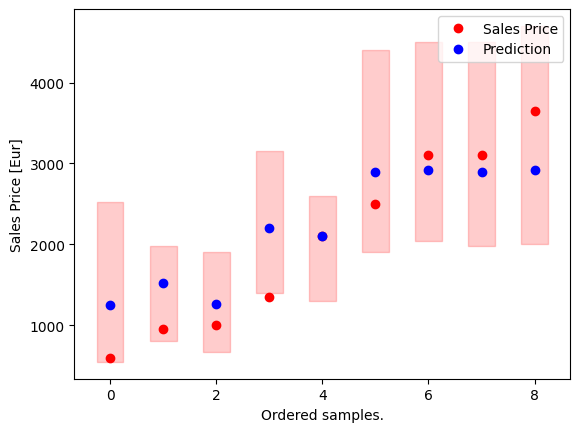

<Figure size 640x480 with 0 Axes>

In [11]:
df_isframeset = full_test_df[full_test_df['is_frameset'] != 0]
result = df_isframeset[['low', 'high','sales_price', 'prediction']]
prediction_interval(result)

In [12]:
mean_absolute_percentage_error(y_test, preds), mean_absolute_percentage_error(result['sales_price'], result['prediction'])

NameError: name 'mean_absolute_percentage_error' is not defined

In [ ]:
result = pd.concat([interval, y_test.reset_index(drop=True), preds], axis=1)
result.columns = ['low', 'high','sales_price', 'prediction']
prediction_interval(result)


In [ ]:
importances = model.feature_importances_
len(importances), type(importances)

(68, numpy.ndarray)

In [ ]:
df_features = pd.DataFrame(importances, index = X_train.columns, columns=['importance'])
df_features

,importance
template_id,0.008502
brake_type_code_hydraulic,0.004782
brake_type_code_rim,0.026907
brake_type_code_None,0.000275
brake_type_code_mechanical_disc,0.000233
...,...
rider_height_max,0.008062
sales_duration,0.008855
quality_score,0.018709
bike_created_at_month_sin,0.008834


In [ ]:
df_features.columns

Index(['importance'], dtype='object')

In [ ]:
type(df_features)

pandas.core.frame.DataFrame

In [ ]:
indices = [i for i in df_features.index if 'brake_type_code' in i]
indices

['brake_type_code_hydraulic',
 'brake_type_code_rim',
 'brake_type_code_None',
 'brake_type_code_mechanical_disc',
 'brake_type_code_brake_types',
 'brake_type_code_hydraulic_rim',
 'brake_type_code_-1']

In [ ]:
def combine_columns_with_pattern(df, pattern):
    # Filter columns that match the pattern
    relevant_indices = [i for i in df.index if pattern in i]
    # Combine the values of filtered columns into a single column
    combined_value = df.loc[relevant_indices].sum()
    df = df.drop(index=relevant_indices)
    df.loc[pattern] = combined_value
    return df

In [ ]:
# List of patterns
patterns = ['brake_type_code', 'frame_material_code', 'shifting_code', 'condition_code', 'mileage_code', 'color']

for pattern in patterns:
    df_features = combine_columns_with_pattern(df_features, pattern)

df_features



,importance
template_id,0.008502
sales_country_id,0.008817
bike_type_id,0.003782
bike_category_id,0.013374
motor,0.007586
bike_component_id,0.009794
family_model_id,0.008864
family_id,0.009253
brand_id,0.009682
is_mobile,0.005061


In [ ]:
sum = df_features['importance'].sum()
sum

1.0

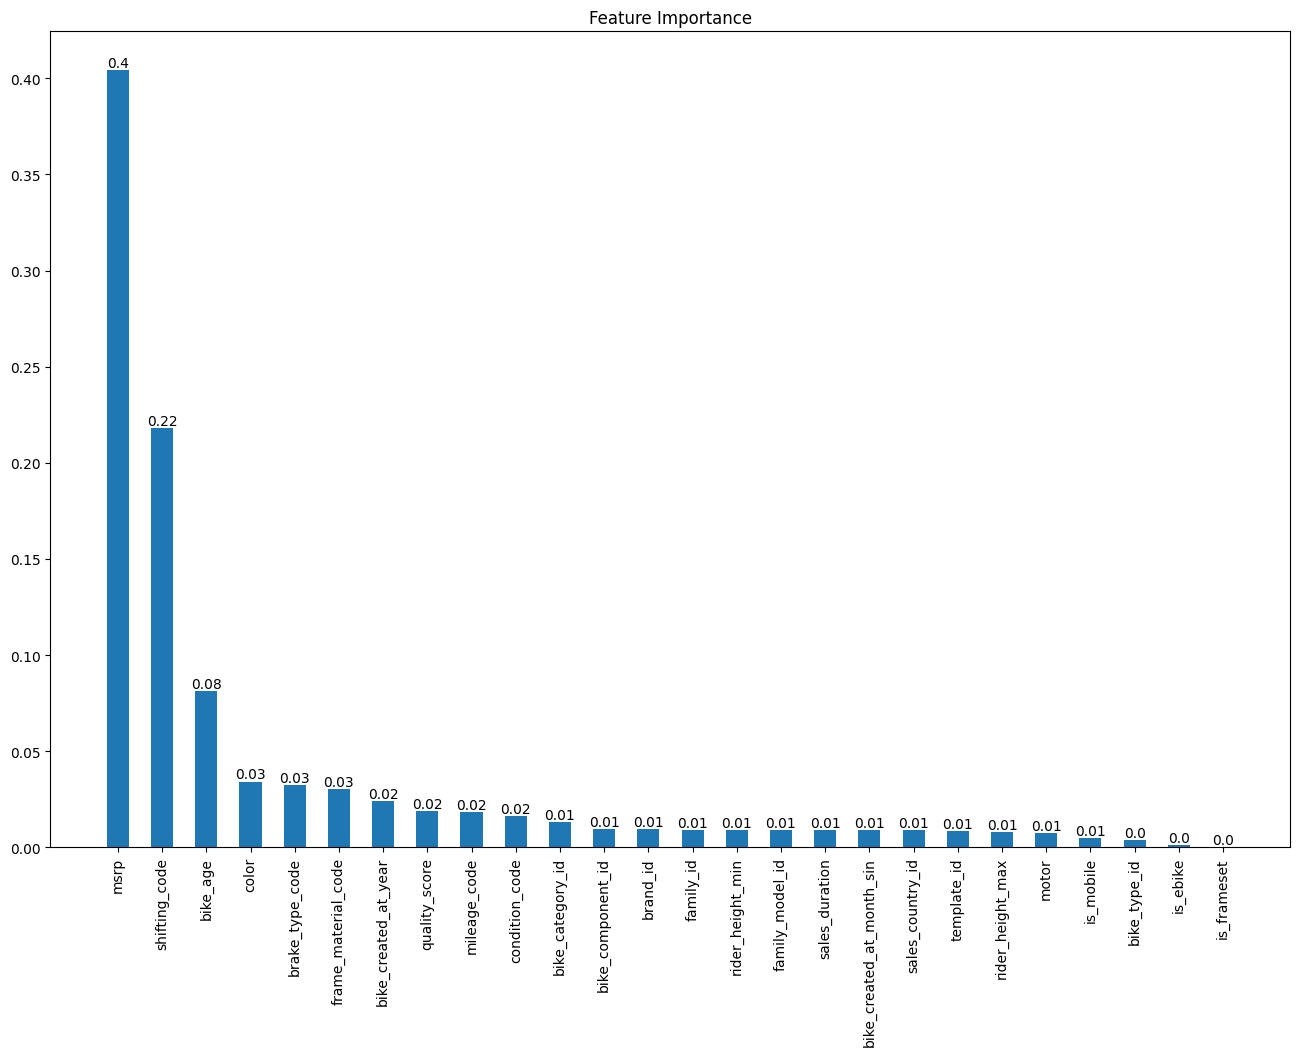

In [ ]:
df_sorted = df_features.sort_values(by='importance', ascending=False)
plt.figure(figsize=(16, 12))
plt.title('Feature Importance')
# plt.bar(df_sorted.index, df_sorted['importance'], align='center', width=0.5)
# Plot the bars
bars = plt.bar(df_sorted.index, df_sorted['importance'], align='center', width=0.5)

# Add the values from the 'importance' column on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.2)
plt.savefig("plot/importances.png")
plt.show()



In [ ]:
# Assuming df is your DataFrame and 'column_name' is the name of the column you want to convert
column_tuples = [(index, value) for index, value in zip(df_sorted.index, df_sorted['importance'])]

print(column_tuples)


[('msrp', 0.4042125028562875), ('shifting_code', 0.21810562194461952), ('bike_age', 0.08155410945037891), ('color', 0.034257211043243564), ('brake_type_code', 0.032661485520481544), ('frame_material_code', 0.030204832263165032), ('bike_created_at_year', 0.024342593810626822), ('quality_score', 0.018709056851138703), ('mileage_code', 0.01852474747497689), ('condition_code', 0.01646818734322065), ('bike_category_id', 0.01337419427774081), ('bike_component_id', 0.009793516569442906), ('brand_id', 0.009681658588583091), ('family_id', 0.009252769904240187), ('rider_height_min', 0.008915344326713535), ('family_model_id', 0.008863879810459897), ('sales_duration', 0.008855404468668475), ('bike_created_at_month_sin', 0.008834444213512205), ('sales_country_id', 0.008817196198831723), ('template_id', 0.008502224438108963), ('rider_height_max', 0.008061613628363464), ('motor', 0.00758603835900765), ('is_mobile', 0.0050609836876809875), ('bike_type_id', 0.003782476996960378), ('is_ebike', 0.0013940

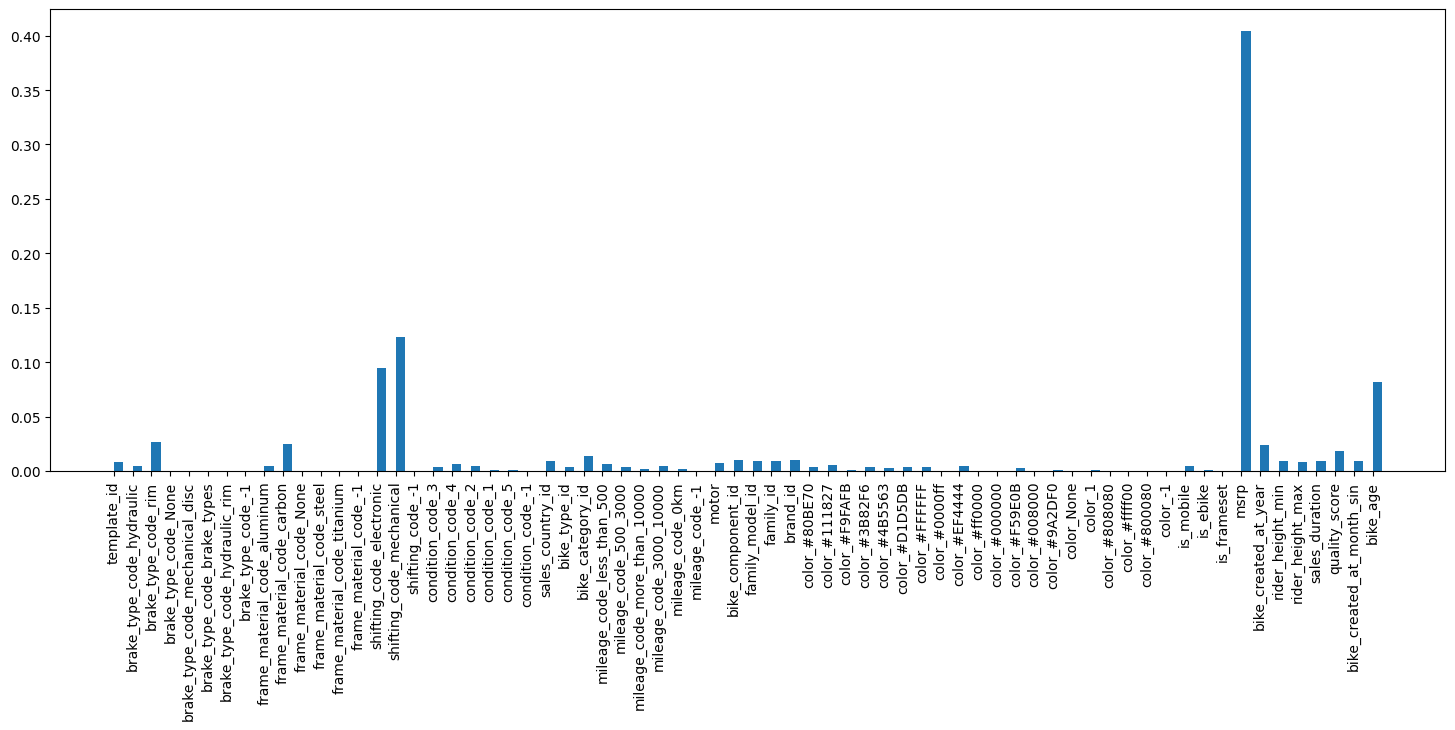

In [ ]:
plt.figure(figsize=(18, 6))
plt.bar(X_train.columns, importances, align='edge', width=0.5)
plt.xticks(rotation=90)
plt.show()

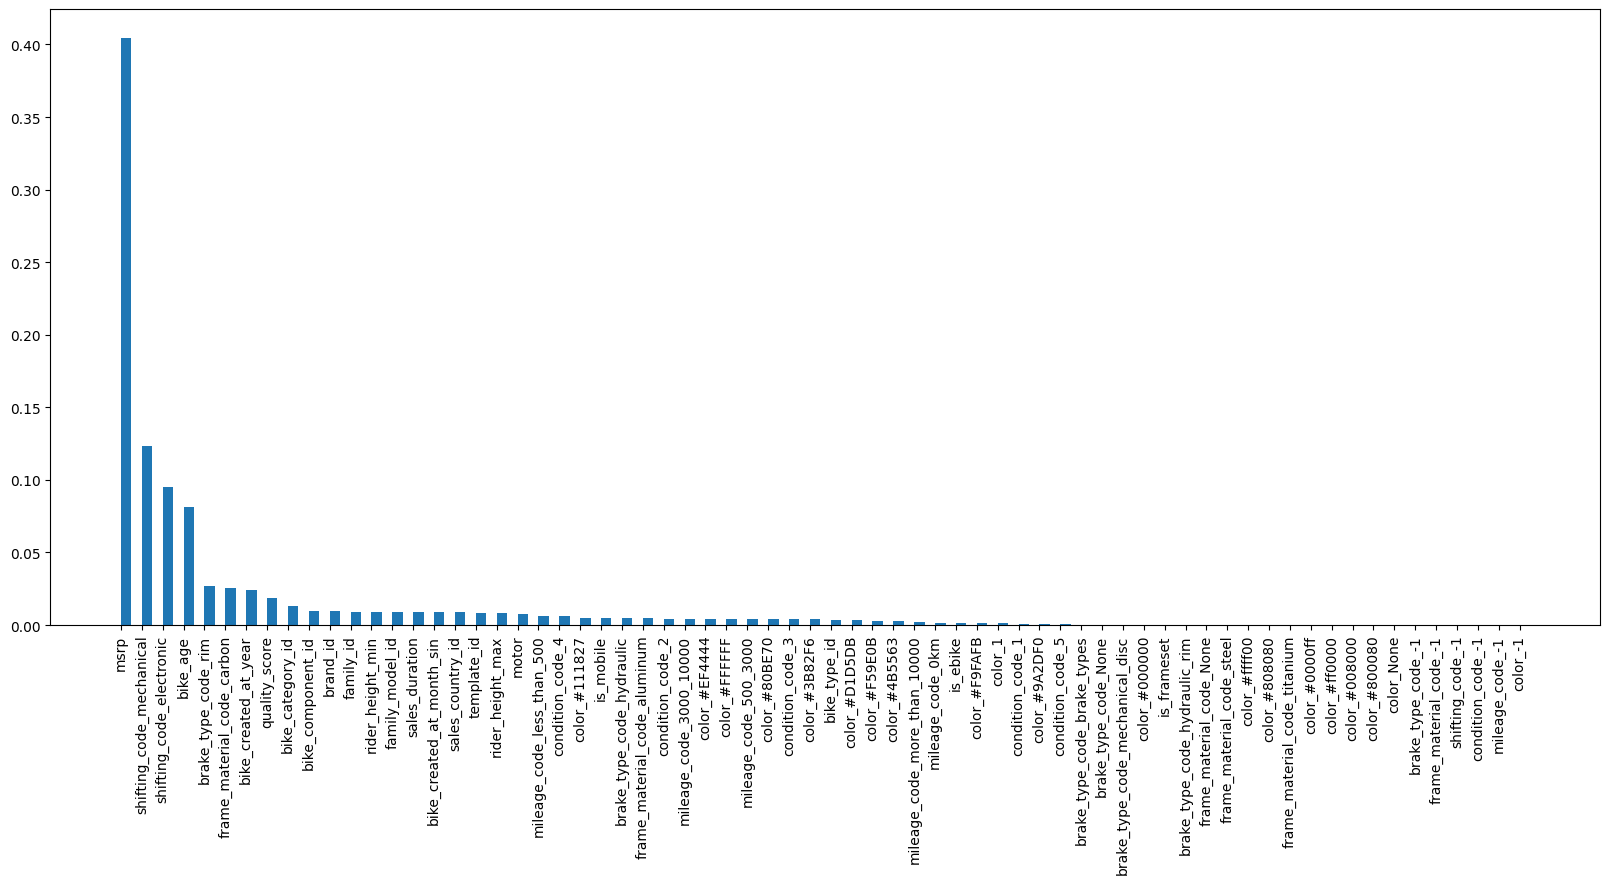

In [ ]:
sorted_importances = sorted(zip(X_train.columns, importances), key=lambda x: x[1], reverse=True)
sorted_columns, sorted_importances = zip(*sorted_importances)
plt.figure(figsize=(20, 8))
plt.bar(sorted_columns, sorted_importances, align='edge', width=0.5)
plt.xticks(rotation=90)
plt.show()

# sales_duration
```
-- take if succeed_at is not null, else take updated_at difference to created_at
CASE
    WHEN bookings.succeed_at IS NOT NULL THEN DATEDIFF(bookings.succeed_at,bikes.created_at)
    ELSE DATEDIFF(bookings.updated_at,bikes.created_at)

END as sales_duration,
```
```
SELECT bike_id, succeed_at, created_at,DATEDIFF(succeed_at,created_at) as duration FROM bookings WHERE succeed_at IS NOT NULL ORDER BY duration DESC LIMIT 10
-----> in data max duration of sold bike is for bike_id 82020 for 240 days 
```
```
SELECT bike_id, updated_at, created_at,DATEDIFF(updated_at,created_at) as duration FROM bookings ORDER BY duration DESC LIMIT 10
-----> unsold bike, max duration 722 days with bike_id 14148
```
### return days, after scaler -> 0~1, set wich number will add accurency?

## Idea

### in feature engineering, set a limit for outsider -> 6 months? 

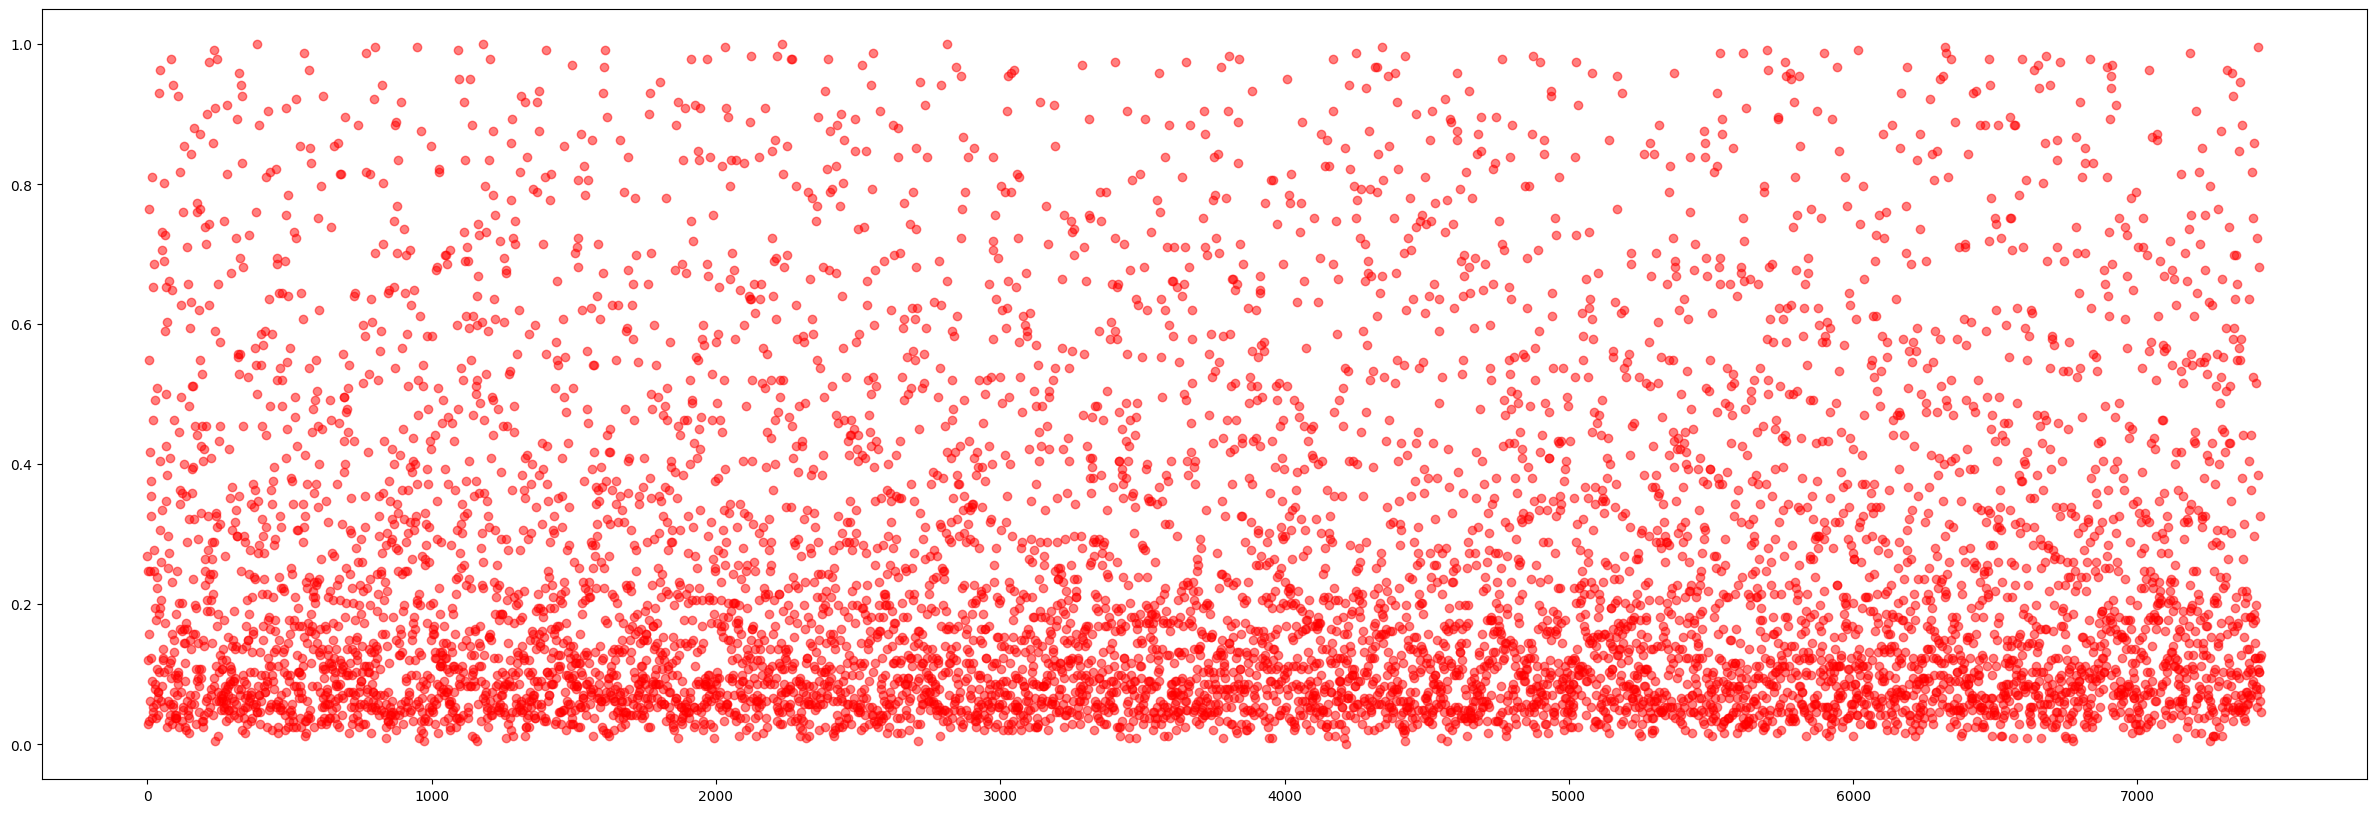

In [ ]:
plt.figure(figsize=(30, 10))
plt.scatter(range(X_train.shape[0]), X_train['sales_duration'],color='red', alpha=0.5)

In [ ]:
X_train['sales_duration'].mean(), X_train['sales_duration'].max(), X_train['sales_duration'].min()

(0.25466070801417273, 1.0, 0.0)

In [ ]:
X_train['sales_duration'].mode()

0    0.053719
Name: sales_duration, dtype: float64

In [ ]:
X_test['sales_duration'].mean(), X_test['sales_duration'].max(), X_test['sales_duration'].min()

(0.07788314802703292, 0.21487603305785125, -0.004132231404958678)

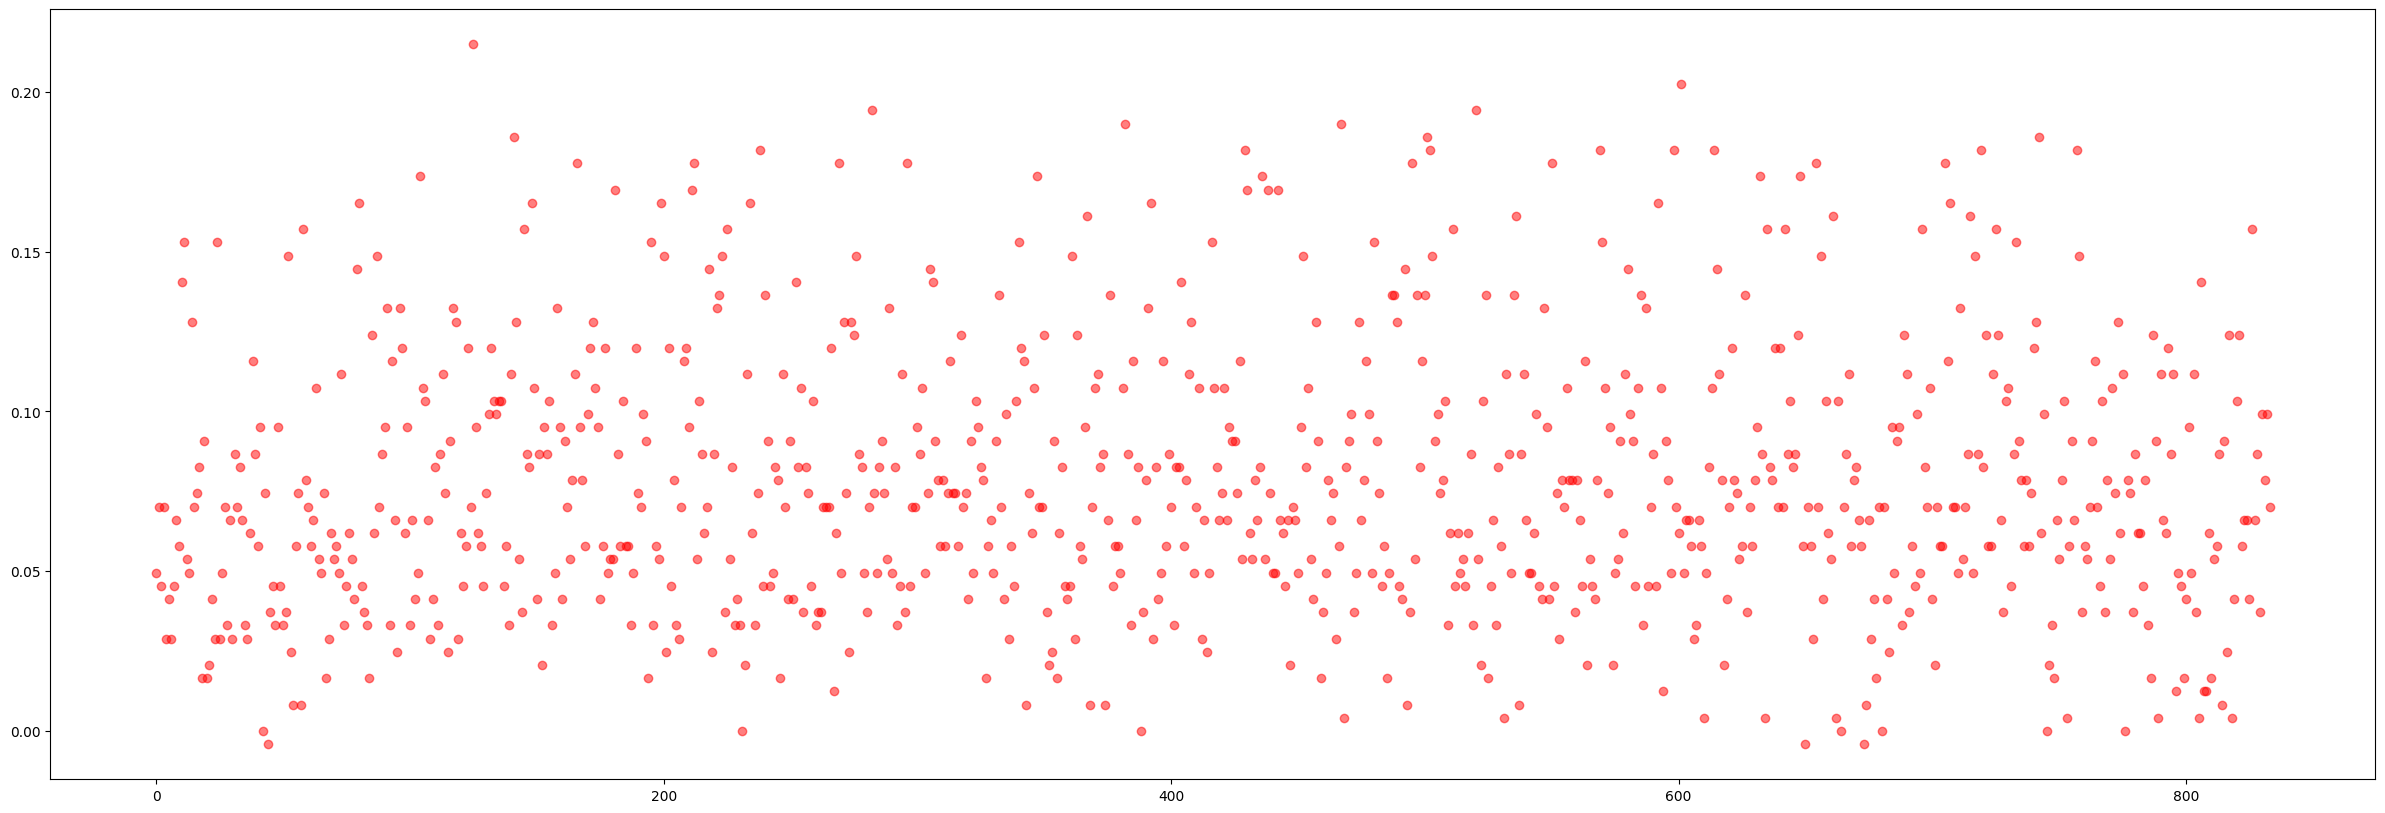

In [ ]:
plt.figure(figsize=(30, 10))
plt.scatter(range(X_test.shape[0]), X_test['sales_duration'],color='red', alpha=0.5)

In [ ]:
from src.plots import plot_pred, plot_difference, plot_pred_kde, analyze_results, prediction_interval

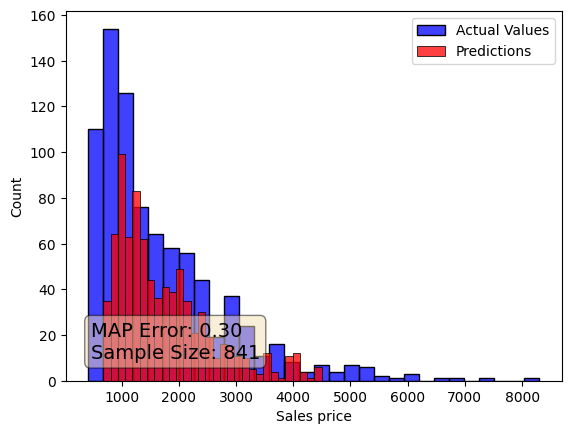

In [ ]:
plot_pred(y_test,preds,0.3)

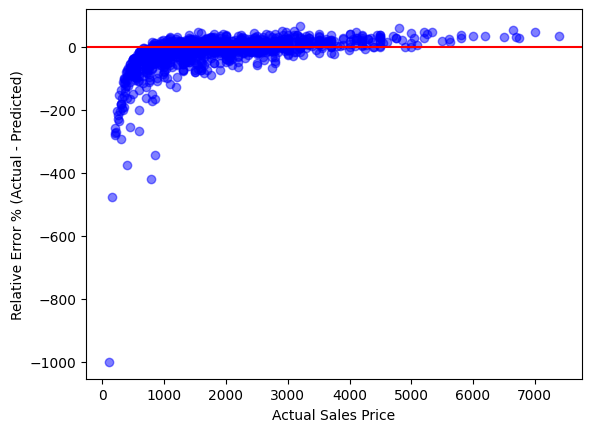

In [ ]:
plot_difference(y_test, preds)

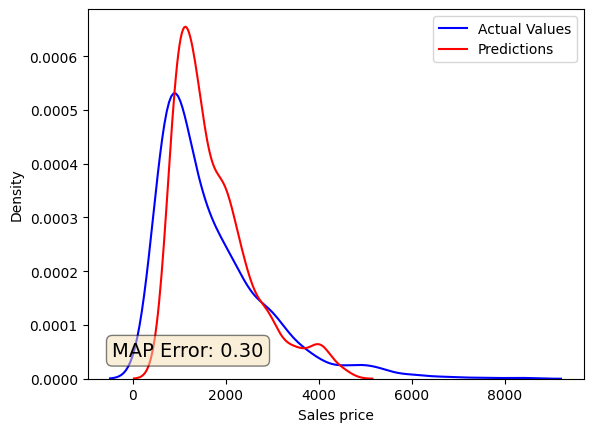

In [ ]:
plot_pred_kde(y_test, preds, 0.3, file_name="plot/kde.png")

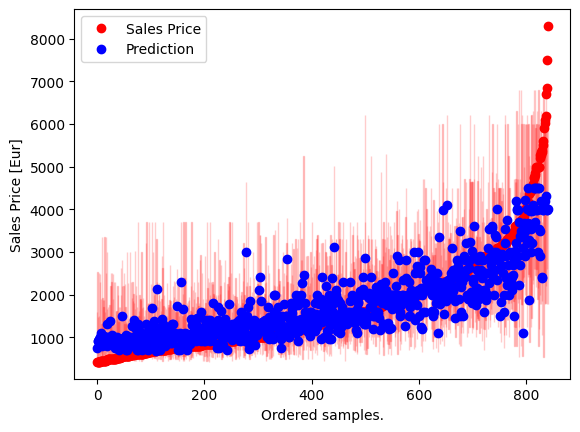

<Figure size 640x480 with 0 Axes>

In [ ]:
result = pd.concat([interval, y_test.reset_index(drop=True), preds], axis=1)
result.columns = ['low', 'high','sales_price', 'prediction']
prediction_interval(result)


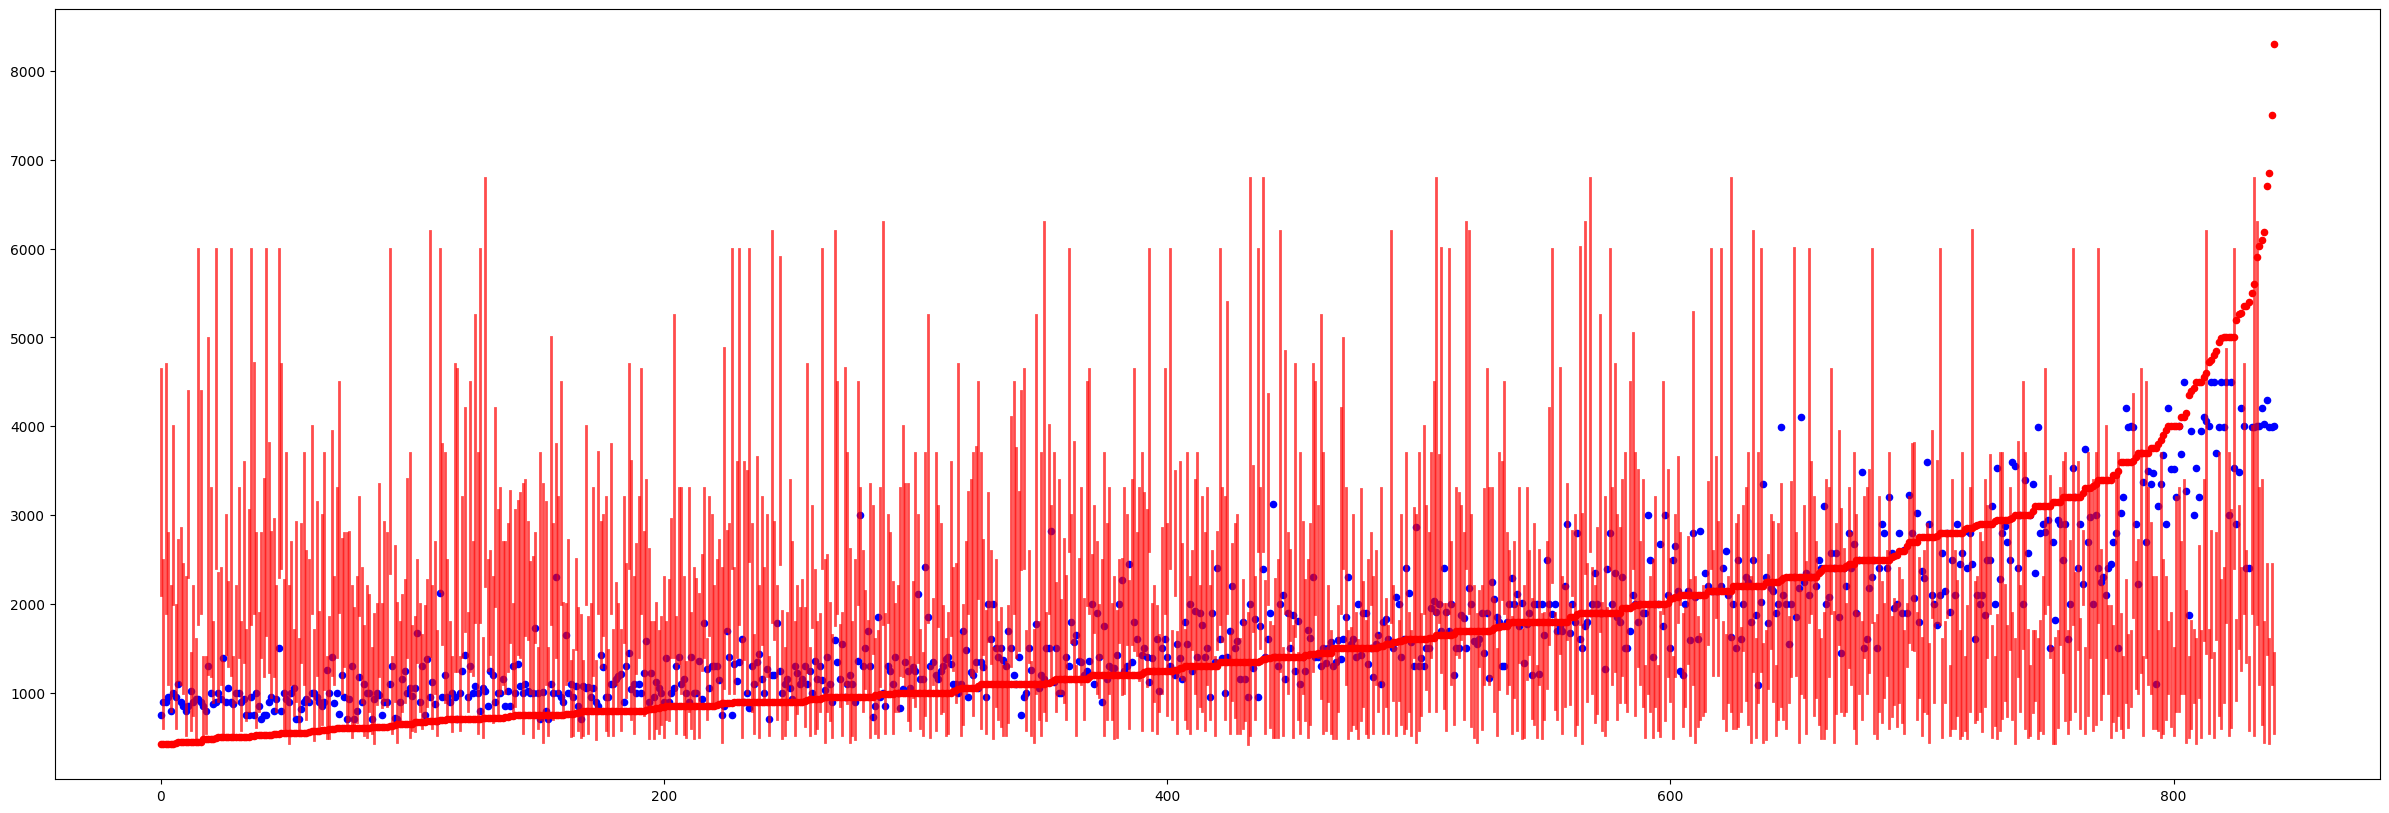

In [ ]:
result = pd.concat([interval, y_test.reset_index(drop=True), preds], axis=1)
result.columns = ['low', 'high','sales_price', 'prediction']
result = result.sort_values("sales_price")
plt.figure(figsize=(30, 10))
for i  in range(result.shape[0]):
    plt.plot([i, i], [result['low'][i], result['high'][i]], color='red',linewidth=2, alpha=0.7)
plt.scatter(range(result.shape[0]),result['prediction'], color='blue', s=20)
plt.scatter(range(result.shape[0]),result['sales_price'], color='red', s=20)

plt.savefig("plot/interval_big.png")

### Compare y_test and preds, that in high price the error become bigger

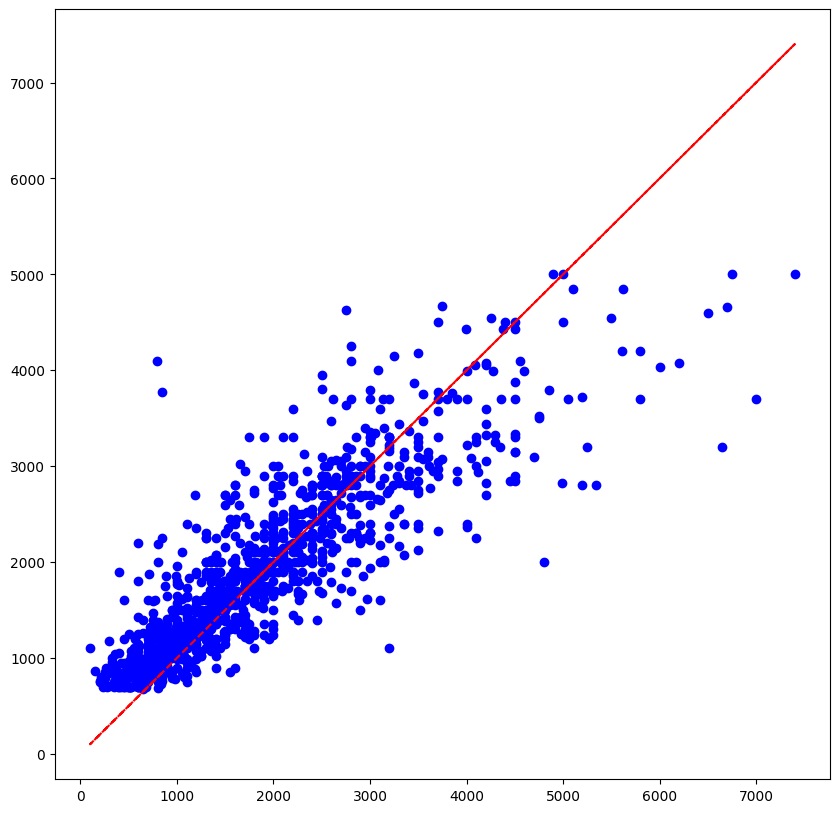

In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(y_test, preds, color='blue')
plt.plot(y_test, y_test, color='red', linestyle='--')

### 1.mean absolute percentage error 
### 2.how many % of real price fall in the interval, compare y_test and interval
### 

In [56]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred):
    """
    Calculate Mean Absolute Percentage Error (MAPE).

    Parameters:
    - y_true: array-like, true values.
    - y_pred: array-like, predicted values.

    Returns:
    - MAPE: float, Mean Absolute Percentage Error.
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [63]:
mean_absolute_percentage_error(y_test, preds)

25.55204771248359

In [57]:
def cal_inside_interval(y_true, interval):
    count_within_intervals = 0
    for i, row in interval.iterrows():
        count_within_intervals += ((y_true.iloc[i] >= row['low']) & (y_true.iloc[i] <= row['high'])).sum()

    percentage_within_intervals = (count_within_intervals / len(y_true)) * 100
    return percentage_within_intervals


In [64]:
cal_inside_interval(y_test, interval)

89.34147997284454

In [ ]:
categorical_features = [
        "template_id",
        "brake_type_code",
        "frame_material_code",
        "shifting_code",
        "condition_code",
        "sales_country_id",
        "bike_type_id",
        "bike_category_id",
        "mileage_code",
        "motor",
        "bike_component_id",
        "family_model_id",
        "family_id",
        "brand_id",
        "color",
        "is_mobile",
        "is_ebike",
        "is_frameset",
    ]

In [ ]:
type(categorical_features)

list

In [ ]:
from src.evaluate import record_model

In [ ]:
record_model("test")

/Users/xinyu/opt/anaconda3/envs/price/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but ExtraTreesQuantileRegressor was fitted without feature names
  warnings.warn(


<class 'quantile_forest._quantile_forest.ExtraTreesQuantileRegressor'> Train error: 0.0
25.09389633782461
87.45614035087719


/Users/xinyu/opt/anaconda3/envs/price/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but ExtraTreesQuantileRegressor was fitted without feature names
  warnings.warn(


In [ ]:
main_query = """
                SELECT


                bikes.id as id,
                bikes.bike_template_id as template_id,

                -- traget
                booking_accountings.bike_price_currency as sales_price,

                -- prices


                bikes.msrp as msrp,


                -- temporal

                year(bikes.created_at) as bike_created_at_year,
                month(bikes.created_at) as bike_created_at_month,
                bikes.year as bike_year,



                -- take if succeed_at is not null, else take updated_at difference to created_at
                CASE
                    WHEN bookings.succeed_at IS NOT NULL THEN DATEDIFF(bookings.succeed_at,bikes.created_at)
                    ELSE DATEDIFF(bookings.updated_at,bikes.created_at)

                END as sales_duration,



                -- spatial

                bikes.country_id as sales_country_id,

                -- categorizing
                bikes.bike_type_id as bike_type_id,
                bikes.bike_category_id as bike_category_id,
                bikes.mileage_code as mileage_code,
                bikes.motor as motor,

                bikes.condition_code as condition_code,



                bike_additional_infos.rider_height_min as rider_height_min,
                bike_additional_infos.rider_height_max as rider_height_max,


                bikes.brake_type_code as brake_type_code,
                bikes.frame_material_code as frame_material_code,
                bikes.shifting_code as shifting_code,






                bikes.bike_component_id as bike_component_id,

                -- find similarity between hex codes
                bikes.color as color,

                -- quite specific
                bikes.family_model_id as family_model_id,
                bikes.family_id as  family_id,
                bikes.brand_id as brand_id,

                -- quality score
                quality_scores.score AS quality_score,

                -- is_mobile
                bikes.is_mobile as is_mobile,

                -- currency

                -- seller id

                -- is_frameset
                bike_template_additional_infos.is_ebike as is_ebike,
                bike_template_additional_infos.is_frameset as is_frameset




                FROM bikes

                join bookings on bikes.id = bookings.bike_id
                join booking_accountings on bookings.id = booking_accountings.booking_id


                join quality_scores on bikes.id = quality_scores.bike_id


                join bike_template_additional_infos on bikes.bike_template_id = bike_template_additional_infos.bike_template_id

                join bike_additional_infos on bikes.id = bike_additional_infos.bike_id


                WHERE bikes.status = 'sold'
                AND (bookings.status = 'paid_out' OR bookings.status = 'success' OR bookings.status = 'sell_link_confirm' OR bookings.status = 'capture' OR bookings.status = 'paid')
             """

# id, 26 features and 1 label
main_query_dtype = {
    "id": pd.Int64Dtype(),
    "template_id": pd.Int64Dtype(),
    "sales_price": pd.Float64Dtype(),
    "sales_duration": pd.Int64Dtype(),
    "msrp": pd.Float64Dtype(),
    "bike_created_at_year": pd.Int64Dtype(),
    "bike_created_at_month": pd.Int64Dtype(),
    "bike_year": pd.Int64Dtype(),
    "sales_country_id": pd.Int64Dtype(),
    "bike_type_id": pd.Int64Dtype(),
    "bike_category_id": pd.Int64Dtype(),
    "mileage_code": str,
    "motor": pd.Int64Dtype(),
    "rider_height_min": pd.Float64Dtype(),
    "rider_height_max": pd.Float64Dtype(),
    "brake_type_code": str,
    "condition_code": str,
    "frame_material_code": str,
    "shifting_code": str,
    "bike_component_id": pd.Int64Dtype(),
    "color": str,
    "family_model_id": pd.Int64Dtype(),
    "family_id": pd.Int64Dtype(),
    "brand_id": pd.Int64Dtype(),
    "quality_score": pd.Int64Dtype(),
    "is_mobile": pd.Int64Dtype(),
    "is_ebike": pd.Int64Dtype(),
    "is_frameset": pd.Int64Dtype(),
}

In [ ]:
from buycycle.data import sql_db_read, DataStoreBase
import pandas as pd
config_paths = "config/config.ini"
index_col = "sales_price"
df = sql_db_read(query=main_query, DB="DB_BIKES", config_paths=config_paths, dtype=main_query_dtype, index_col=index_col)

In [ ]:
df2 = df[["bike_created_at_year", "bike_created_at_month"]]

In [ ]:
df_sorted = df2.sort_values(by=["bike_created_at_year", "bike_created_at_month"])
df_sorted

,bike_created_at_year,bike_created_at_month
sales_price,,
1300.0,2021,5
599.0,2021,6
3200.0,2021,6
650.0,2021,7
1666.0,2021,8
...,...,...
900.0,2024,4
2700.0,2024,4
2400.0,2024,4


In [ ]:
n = int(df.shape[0]*0.10)
n

1392

In [ ]:
df_new = df_sorted.tail(n)
df_new

,bike_created_at_year,bike_created_at_month
sales_price,,
1900.0,2024,3
2400.0,2024,3
1501.0,2024,3
5200.0,2024,3
1700.0,2024,3
...,...,...
900.0,2024,4
2700.0,2024,4
2400.0,2024,4


## Explore sales_duration

In [43]:
from src.data import get_data, clean_data,feature_engineering, ModelStore
from src.driver import (
    main_query,
    main_query_dtype,
    categorical_features,
    numerical_features,
    target,
)
print("categorical_features: ",categorical_features)
print("numerical_features: ",numerical_features)

categorical_features:  ['brake_type_code', 'frame_material_code', 'shifting_code', 'condition_code', 'bike_category_id', 'mileage_code', 'color']
numerical_features:  ['msrp', 'bike_created_at_month', 'bike_created_at_year', 'bike_year', 'sales_duration', 'quality_score']


In [48]:
data = get_data(main_query, main_query_dtype, index_col='id')
data = clean_data(data, numerical_features, categorical_features,target,2)
data = feature_engineering(data)
data.shape, data.head()

((11880, 14),
         brake_type_code frame_material_code shifting_code condition_code   
 id                                                                         
 367442  mechanical_disc              carbon    mechanical              3  \
 123079        hydraulic              carbon    electronic              3   
 113503              rim            aluminum    mechanical              2   
 123267        hydraulic              carbon    mechanical              2   
 127143              rim              carbon    mechanical              2   
 
         bike_category_id     mileage_code    color    msrp   
 id                                                           
 367442                 1  more_than_10000  #80BE70  3500.0  \
 123079                 1         500_3000        1  3299.0   
 113503                 1    less_than_500  #111827  1075.0   
 123267                 1       3000_10000  #EF4444  3899.0   
 127143                 1  more_than_10000  #111827  3000.0   
 
  

In [49]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

categorical_columns = ['brake_type_code', 'condition_code','frame_material_code', 'shifting_code', 'mileage_code', 'color']
data_categorical = data[categorical_columns]


cate_encoded = ordinal_encoder.fit_transform(data_categorical)

# Replace the original categorical columns with the encoded values in the DataFrame
data[categorical_columns] = cate_encoded
data


,brake_type_code,frame_material_code,shifting_code,condition_code,bike_category_id,mileage_code,color,msrp,bike_created_at_year,sales_duration,quality_score,sales_price,bike_created_at_month_sin,bike_age
id,,,,,,,,,,,,,,
367442,4.0,2.0,1.0,2.0,1,4.0,8.0,3500.0,2023,32,43,800.0,-0.866025,9
123079,2.0,2.0,0.0,2.0,1,2.0,18.0,3299.0,2022,24,57,2100.0,-0.0,4
113503,5.0,1.0,1.0,1.0,1,3.0,3.0,1075.0,2022,77,43,425.0,-0.5,11
123267,2.0,2.0,1.0,1.0,1,1.0,11.0,3899.0,2022,18,53,2300.0,-0.0,6
127143,5.0,2.0,1.0,1.0,1,4.0,3.0,3000.0,2022,31,55,800.0,-0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713806,2.0,2.0,0.0,2.0,1,3.0,12.0,3999.0,2024,4,61,2480.0,0.866025,1
596916,2.0,2.0,1.0,3.0,29,0.0,10.0,5100.0,2024,42,49,2000.0,1.0,2
692373,5.0,2.0,1.0,2.0,1,1.0,14.0,2900.0,2024,9,35,950.0,0.866025,8


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11880 entries, 367442 to 699980
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brake_type_code            11880 non-null  float64
 1   frame_material_code        11880 non-null  float64
 2   shifting_code              11880 non-null  float64
 3   condition_code             11880 non-null  float64
 4   bike_category_id           11879 non-null  Int64  
 5   mileage_code               11880 non-null  float64
 6   color                      11880 non-null  float64
 7   msrp                       11880 non-null  Float64
 8   bike_created_at_year       11880 non-null  Int64  
 9   sales_duration             11880 non-null  Int64  
 10  quality_score              11880 non-null  Int64  
 11  sales_price                11880 non-null  Float64
 12  bike_created_at_month_sin  11880 non-null  Float64
 13  bike_age                   11880 non-null  In

In [55]:
data.isnull().sum()

brake_type_code              0
frame_material_code          0
shifting_code                0
condition_code               0
bike_category_id             1
mileage_code                 0
color                        0
msrp                         0
bike_created_at_year         0
sales_duration               0
quality_score                0
sales_price                  0
bike_created_at_month_sin    0
bike_age                     0
dtype: int64

In [62]:
data = data.dropna()
data.isnull().sum()

brake_type_code              0
frame_material_code          0
shifting_code                0
condition_code               0
bike_category_id             0
mileage_code                 0
color                        0
msrp                         0
bike_created_at_year         0
sales_duration               0
quality_score                0
sales_price                  0
bike_created_at_month_sin    0
bike_age                     0
dtype: int64

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11879 entries, 367442 to 699980
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brake_type_code            11879 non-null  float64
 1   frame_material_code        11879 non-null  float64
 2   shifting_code              11879 non-null  float64
 3   condition_code             11879 non-null  float64
 4   bike_category_id           11879 non-null  Int64  
 5   mileage_code               11879 non-null  float64
 6   color                      11879 non-null  float64
 7   msrp                       11879 non-null  Float64
 8   bike_created_at_year       11879 non-null  Int64  
 9   sales_duration             11879 non-null  Int64  
 10  quality_score              11879 non-null  Int64  
 11  sales_price                11879 non-null  Float64
 12  bike_created_at_month_sin  11879 non-null  Float64
 13  bike_age                   11879 non-null  In

In [63]:
print(data.var())

brake_type_code              1.697010e+00
frame_material_code          2.827515e-01
shifting_code                1.754613e-01
condition_code               4.652659e-01
bike_category_id             1.340010e+02
mileage_code                 9.314294e-01
color                        1.692348e+01
msrp                         5.016985e+06
bike_created_at_year         4.344924e-01
sales_duration               2.320700e+03
quality_score                9.118366e+01
sales_price                  1.440940e+06
bike_created_at_month_sin    5.371888e-01
bike_age                     7.346648e+00
dtype: float64


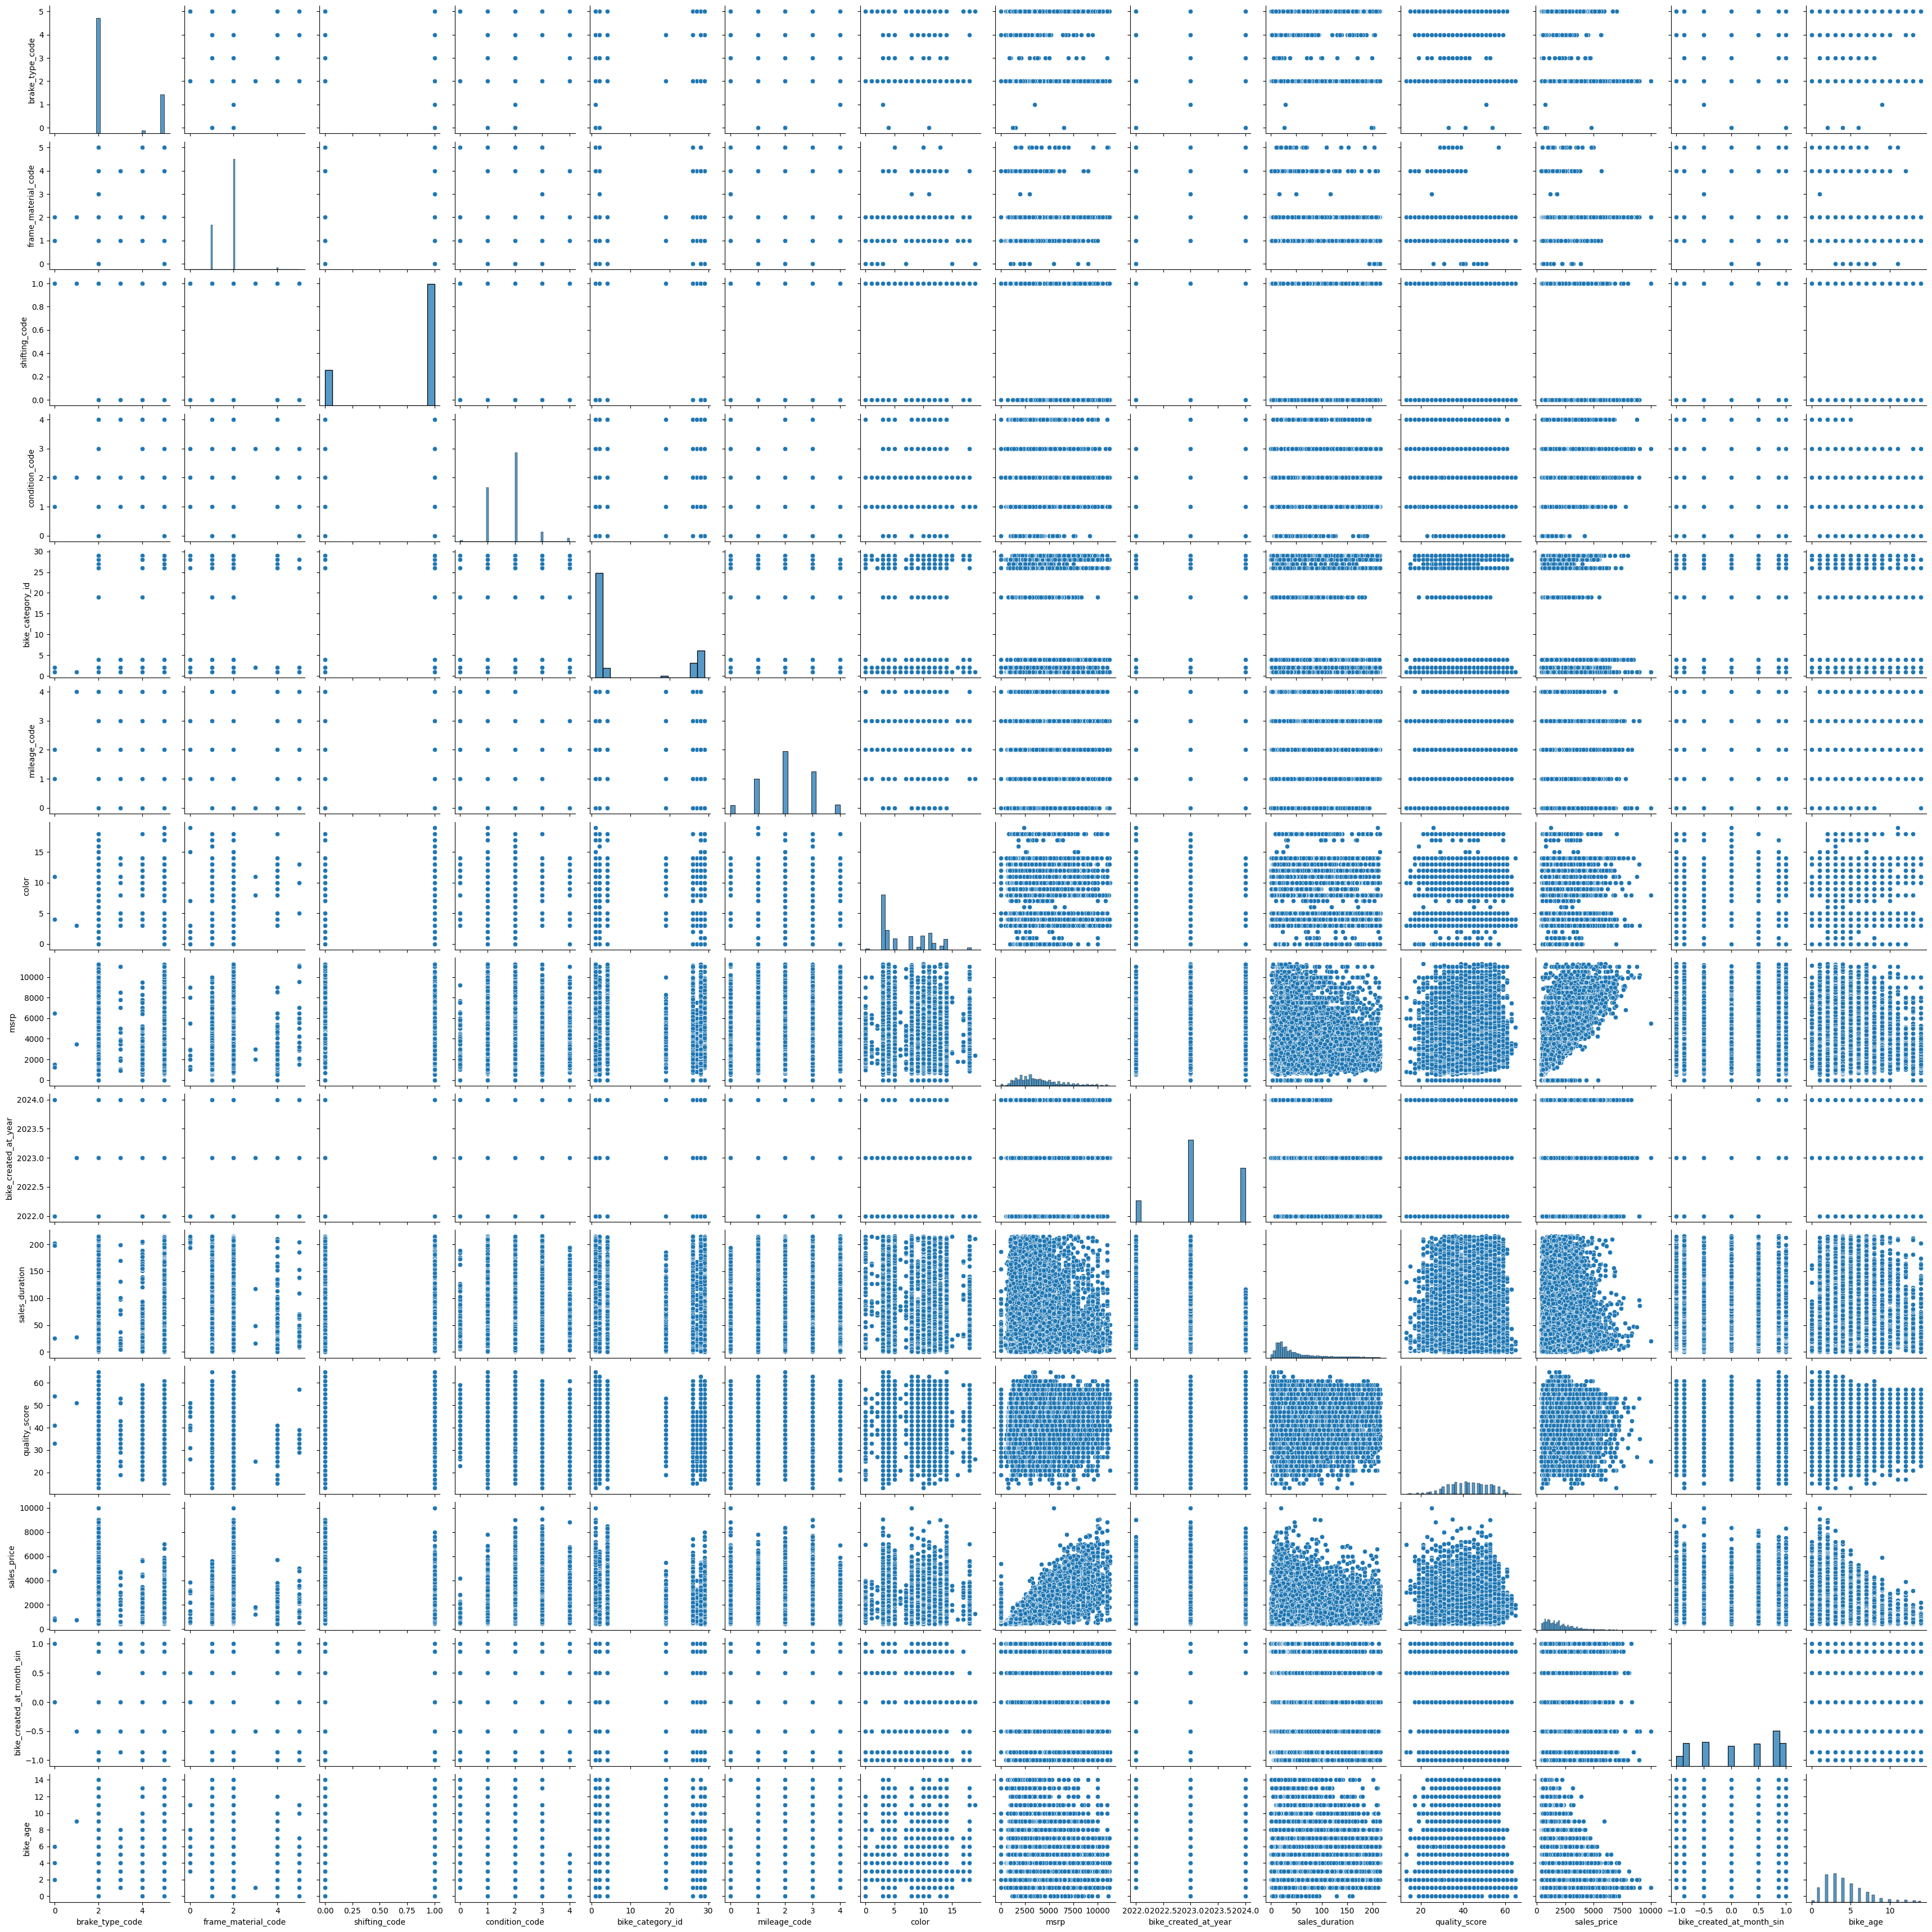

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(data)
plt.savefig("plot/sales_duration.png")

# Show the plot
plt.show()



In [6]:
data.shape

(14372, 27)

In [17]:
# duplicates_mask = data.duplicated(subset=['id'], keep=False)
# duplicate_values = data[duplicates_mask]['id']
duplicate_indices = data.index[data.index.duplicated(keep=False)]
len(duplicate_indices)
duplicate_rows = data[data.index.isin(duplicate_indices)]
duplicate_rows.sort_index()

,template_id,brake_type_code,frame_material_code,shifting_code,condition_code,sales_country_id,bike_type_id,bike_category_id,mileage_code,motor,...,is_frameset,msrp,bike_created_at_month,bike_created_at_year,bike_year,rider_height_min,rider_height_max,sales_duration,quality_score,sales_price
id,,,,,,,,,,,,,,,,,,,,,


In [144]:
duplicate_values

sales_price
2200.0    177134
2300.0    173167
2300.0    177134
2300.0    173167
925.0     454874
           ...  
650.0     553978
400.0     477898
400.0     477898
899.0     709171
899.0     709171
Name: id, Length: 104, dtype: Int64

In [170]:
duplicate_values = duplicate_values.to_frame()

In [173]:
len(duplicate_values)

104

In [163]:
counts=duplicate_values.groupby("id").size().reset_index(name='count')
counts

,id,count
0,27212,2
1,74903,2
2,76382,2
3,80583,2
4,80614,2
5,87301,2
6,90008,2
7,100756,2
8,173167,2
9,177134,2
